<a href="https://colab.research.google.com/github/FarahYusri12/Warfarin_Dosing_Prediction-Model_Comparison/blob/main/Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

ridge=pd.read_csv('Ridge_Regression_result.csv')
linear=pd.read_csv('Linear_Regression_result.csv')
tree=pd.read_csv('Decision_Tree_result.csv')
boost=pd.read_csv('Gradient_Boosting_result.csv')

result=pd.concat([ridge, linear, tree, boost], ignore_index=True)

display(result)

,Model,R2,MAE,RMSE
0,Ridge Regression,0.464363,8.665748,12.263122
1,Linear Regression,0.464521,8.677009,12.261315
2,Decision Tree,0.379159,9.422518,13.202487
3,Gradient Boosting,0.425833,8.730710,12.696518


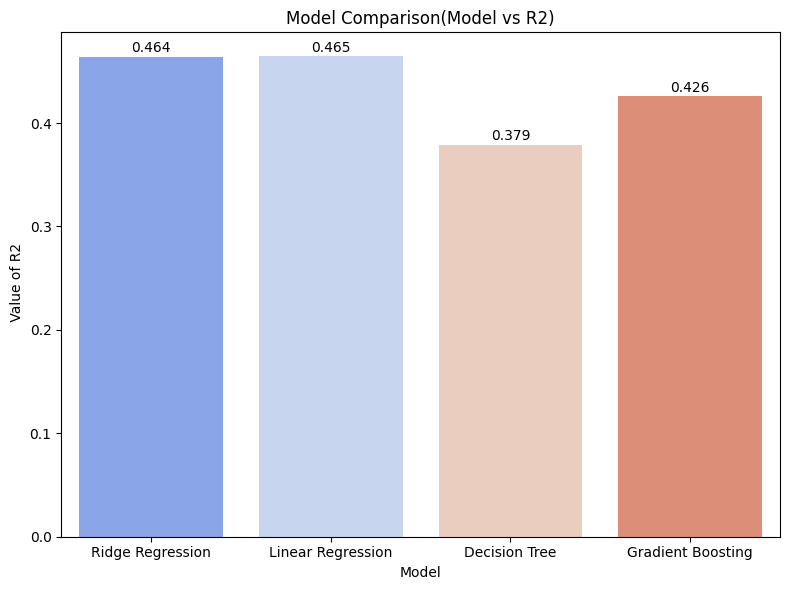

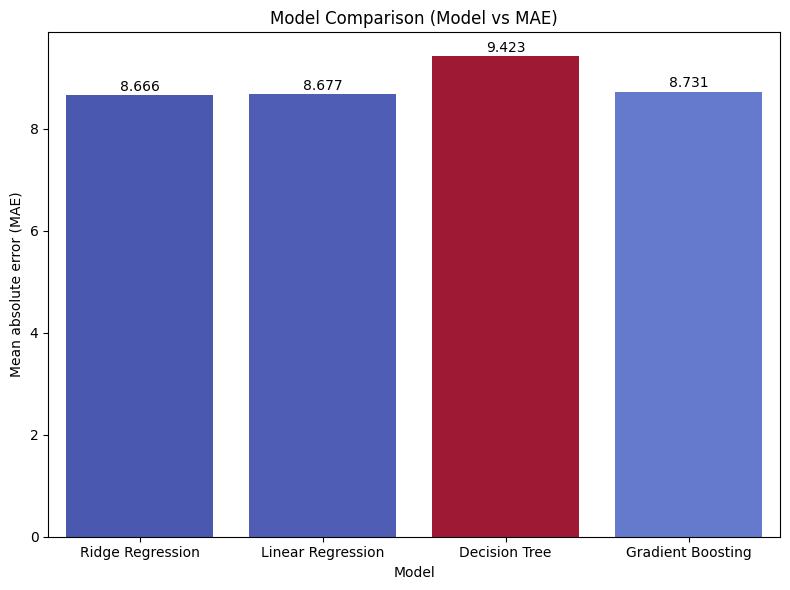

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot model vs R2
plt.figure(figsize=(8,6))
ax=sns.barplot(
    x='Model',
    y='R2',
    data=result,
    hue='Model',
    palette="coolwarm",
    legend=False
)

plt.xlabel("Model")
plt.ylabel(" Value of R2")
plt.title("Model Comparison(Model vs R2)")
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", padding=1)

plt.tight_layout()
plt.show()

print("\n" + "="*100 + "\n")

# Barplot Model vs MAE
plt.figure(figsize=(8,6))
ax=sns.barplot(
    x='Model',
    y='MAE',
    data=result,
    hue='MAE',
    palette="coolwarm",
    legend=False
)


plt.xlabel("Model")
plt.ylabel("Mean absolute error (MAE)")
plt.title("Model Comparison (Model vs MAE)")
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", padding=1)

plt.tight_layout()
plt.show()

In [3]:
Tree_perm=pd.read_csv('Decision_Tree_perm_importance.csv')
Tree_perm['Model']='Decision Tree'

Boosting_perm=pd.read_csv('Gradient_Boosting_perm_importance.csv')
Boosting_perm['Model']='Gradient Boosting'

Linear_perm=pd.read_csv('Linear_Regression_perm_importance.csv')
Linear_perm['Model']='Linear Regression'

Ridge_perm=pd.read_csv('Ridge_Regression_perm_importance.csv')
Ridge_perm['Model']='Ridge Regression'

result_perm=pd.concat([Tree_perm, Boosting_perm, Linear_perm, Ridge_perm])


compare_table=result_perm.pivot_table(
    index='Feature',
    columns='Model',
    values='Importance_mean',
    aggfunc='mean'
)
# custom order to arrange the feature
feature_order=['CYP2C9_code', 'VKORC1_code', 'Age', 'Gender_code', 'Height (cm)', 'Weight (kg)']
compare_table=compare_table.reindex(feature_order)


display(compare_table)

Model,Decision Tree,Gradient Boosting,Linear Regression,Ridge Regression
Feature,,,,
CYP2C9_code,0.515743,0.670059,0.955112,0.913647
VKORC1_code,4.038962,3.481610,3.618585,3.538629
Age,0.669661,0.972125,0.972010,0.953085
Gender_code,0.000000,-0.006301,0.093104,0.087851
Height (cm),0.216282,0.426975,0.216484,0.227944
Weight (kg),0.930372,1.125812,0.846402,0.844320


In [11]:
compare_table1=result_perm.pivot_table(
    index='Feature',
    columns='Model',
    values='Importance_std',
    aggfunc='mean'
)
feature_order=['CYP2C9_code', 'VKORC1_code', 'Age', 'Gender_code', 'Height (cm)', 'Weight (kg)']
compare_table1=compare_table1.reindex(feature_order)
display(compare_table1)









Model,Decision Tree,Gradient Boosting,Linear Regression,Ridge Regression
Feature,,,,
CYP2C9_code,0.097943,0.084630,0.113478,0.108394
VKORC1_code,0.407716,0.258024,0.251093,0.245007
Age,0.142346,0.139390,0.117553,0.115013
Gender_code,0.000000,0.016820,0.042500,0.042265
Height (cm),0.237850,0.125769,0.075994,0.075667
Weight (kg),0.190106,0.138738,0.143378,0.142529


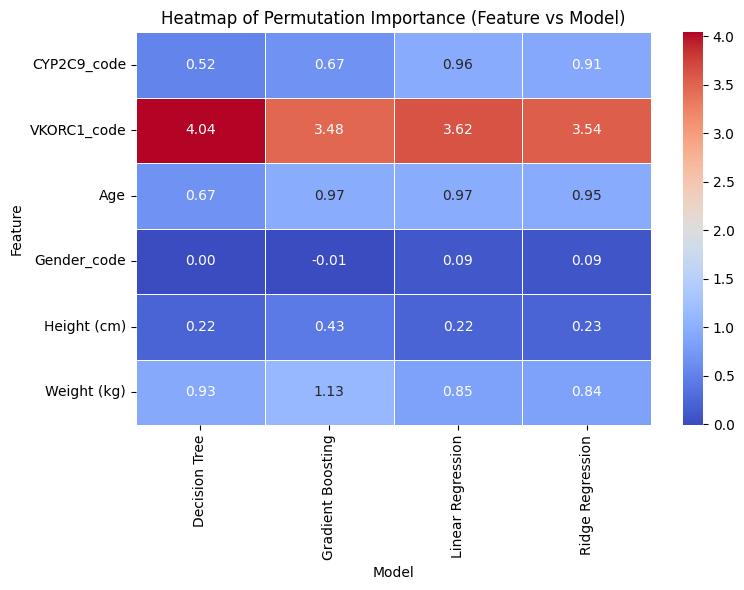

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(compare_table, annot=True, fmt=".2f",cmap="coolwarm", linewidth=0.5)

plt.title('Heatmap of Permutation Importance (Feature vs Model)')
plt.ylabel('Feature')

plt.xlabel('Model')
plt.tight_layout()
plt.show()
